# Expectation Maximisation on Mixture Model

# EDIT NOTES
THE FORMULAS IN THE MARKDOWN IS OLD. We now fix 3 of the 5 parameters $\pi$, $\sigma_1$, $\sigma_2$. We now minimise negative log likelihood w.r.t. $\mu_1$ and $\mu_2$.

We now include colorplot and surface plot. It is easier to see how EM algorithm works now.

# Table of contents
1. [Setting the ground truth](#first-bullet)
2. [Glossary of terms](#Glossary of terms)
2a. [The model](#The model)
2b. [Probabilities](#Probabilities)
2c. [Likelihood](#Likelihood)
2d. [Intermediate values](#Intermediate values)
3. [Generating samples from ground truth](#Generating samples from ground truth)
4. [Defining the negative log-likelihood](#Defining negative log-likelihood)
5. [EM algorithm](#EM algorithm) 
5a. [Expectation Step](#Expectation Step) 
5b. [Maximisation Step](#Maximisation Step)
6. [Performing iterations](#Performing iterations) 
6a. [Setting the initial parameters](#Setting the initial parameters)

We model $Y$ as a mixture of two Gaussian distirbutions, with parameters $\theta = \{p, \mu_1, \sigma_1, \mu_2, \sigma_2\}$:

$$
\begin{align} 
Y_1 &\sim N(\mu_1 , \sigma_1^2 ) \\
Y_2 &\sim N(\mu_2 , \sigma_2^2 ) \\
Y &= (1 - z) \cdot Y_1 + z\cdot Y_2
\end{align}$$

where $z = \{0,1\}$ and $P(z = 1) = p$

This time we fix the probability $p$ and variances $\mu_1,\mu_2$ and it is known. We have $p$ = 0.5 and variances that differ slightly $\mu_1 = 3$, $\mu_2 = 2$

Following is the pdf of $Y$, where $\phi_1$ and $\phi_2$ refer to the two Gaussians represented by $Y_1$ and $Y_2$

$$\begin{align}
P(y|\theta) &= (1 - p) \phi_1(y) + p \phi_2(y)\\
&=\left( 
\frac{1-p}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(y - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{p}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(y - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right)
\end{align}$$

The parameter of $Y$ is $\theta = \left\{ p, \mu_1, \sigma_1, \mu_2, \sigma_2 \right\}$

# Glossary of terms <a class="anchor" id="Glossary of terms"></a>
TODO: ADD CODE HERE

### The model <a class="anchor" id="The model"></a>

$\phi$ The bimodal Mixture Guassian distribution. The model is defined with parameter $\theta$. <br\>
$\theta$ The parameter vector of model $Y$. $\theta$ is made up of parameters $\{p, \mu_1, \sigma_1, \mu_2, \sigma_2\}$


$p$ `pi` The probability of a sample being sampled from Gaussian distribution $\phi_2$ rather than $\phi_1$. <br\>
$z$ The hidden variable that indicates which Gaussian distribution a sample was from. If $z = 0$, then the observation was sampled from $Y_1$. If $z = 1$, then the observation was sampled from $Y_2$.

$\phi_1$ The first Gaussian distribution that makes up the mixture distribution. It is defined by parameters $\mu_1$ and $\sigma_1$ <br\>
$\mu_1$ `mu_1` The mean of Gaussian distribution $\phi_1$ <br\>
$\sigma_1$ `stde_1` The standard deviation of Gaussian distribution $\phi_1$

$\phi_2$ The second Gaussian distribution that makes up the mixture distribution. It is defined by of parameters $\mu_2$ and $\sigma_2$ <br\>
$\mu_2$ `mu_2` The mean of Gaussian distribution $\phi_2$ <br\>
$\sigma_2$ `stde_2` The standard deviation of Gaussian distribution $\phi_2$

$\phi$ The second Gaussian distributions that makes up the mixture distribution.

### Probabilities <a class="anchor" id="Probabilities"></a>

$\mathbf{X}$ `samples` The set of observations $x_i$ of length $N$ sampled from the random variable $Y$. <br\>
$\mathbf{Z}$ The set of hidden variables of length $N$ that corresponds to the "state" $z_i$ of the system at each observation $i$. <br\>


$P(x)$ Probability of event $x$ happening. <br\>

$P(\mathbf{X}| \theta)$ Conditional probability of getting observations $\mathbf{X}$ given the parameters of the model $\theta$.

$P(\mathbf{X}| \mathbf{Z}, \theta)$ Conditional probability of getting observations $\mathbf{X}$ given the hidden variables $\mathbf{Z}$ and parameters of the model $\theta$

$P(\mathbf{X}, \mathbf{Z}| \theta)$ Conditional probability of getting both observations $\mathbf{X}$ and hidden variables $\mathbf{Z}$ given the parameters of the model $\theta$

### Likelihood <a class="anchor" id="Likelihood"></a>

$\ell(x|y)$ The log-likelihood of y given x. $\ell(x|y) = -\log P(y|x)$

$\ell(\theta, \mathbf{X})$ The log-likelihood of parameter $\theta$ and the observations $\mathbf{X}$

$\ell(\theta| \mathbf{X})$ The log-likelihood of observations $\mathbf{X}$ given parameter $\theta$

$\ell(\theta| \mathbf{X}, \mathbf{Z})$ The log-likelihood of observations $\mathbf{X}$ and hidden variables $\mathbf{Z}$ given parameter $\theta$

$\ell(\theta, \mathbf{Z}|\mathbf{X})$ The log-likelihood of observations $\mathbf{X}$ given hidden variables $\mathbf{Z}$ and parameter $\theta$

### Intermediate values  <a class="anchor" id="Intermediate values"></a>
$\gamma$ The responsibility of one of the two Gaussians on a sample, given current model $\theta$. $\gamma_i$ is the probability that the sample $i$ belongs to $\theta_2$ rather than $\theta_1$. 



# Setting the ground truth <a class="anchor" id="first-bullet"></a>

This is the ground truth parameter vector 
<br> $\theta_{true} = (p, \mu_1, \sigma_1, \mu_2, \sigma_2) = $ `pi_true, stde_1_true, mu_2_true, stde_2_true`  

This is used to generate the set of samples.

In [1]:
pi_true = 0.5  # probability if it lies from normal distribution 2 
mu_1_true = 0.
stde_1_true = .5
mu_2_true = 3.
stde_2_true = 1.

We will show $\phi$ as well as $\phi_1$ and $\phi_2$.

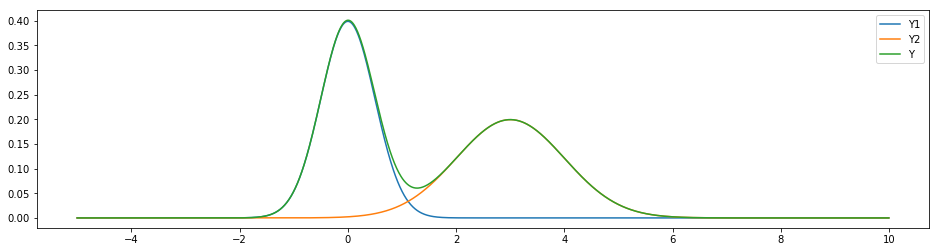

In [2]:
%matplotlib inline
# plotting the pdf
import numpy as np
import matplotlib.pyplot as plt

plot_range = np.arange(-5,10,0.01)
pdf_Y1 = [((1.-pi_true)/(np.sqrt(2.*np.pi*stde_1_true**2.))) * 
          np.exp(-(x - mu_1_true)**2. / (2.*stde_1_true**2)) for x in plot_range]
pdf_Y2 = [(pi_true/(np.sqrt(2.*np.pi*stde_2_true**2.))) * 
          np.exp(-(x - mu_2_true)**2. / (2.*stde_2_true**2)) for x in plot_range]
pdf_Y = np.add(pdf_Y1,pdf_Y2)

plt.figure(figsize=(16,4))
plt.plot(plot_range,pdf_Y1, label="Y1")
plt.plot(plot_range,pdf_Y2, label="Y2")
plt.plot(plot_range,pdf_Y, label="Y")
plt.legend(loc="best")
plt.show()

# Generating samples from ground truth <a class="anchor" id="Generating samples from ground truth"></a>

We will now generate some samples from $\theta_{true}$, and this will be $\mathbf{X}$

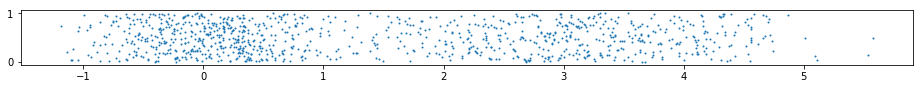

In [3]:
l = 1000
dot_size = 1.

samples = [stde_1_true*np.random.randn() + mu_1_true
           if np.random.random() > pi_true 
           else stde_2_true*np.random.randn() + mu_2_true
           for _ in range(l)]

plt.figure(figsize=(16,1))
plt.scatter(samples,np.random.random(l),s=dot_size)
plt.show()

Plotting the histogram of samples $\mathbf{X}$.

In [4]:
def plot_hist_pdf(samples_, pi_, mu_1_, mu_2_, stde_1_, stde_2_):
    plt.figure(figsize=(16,2))
    pdf_Y1 = [((1.-pi_)/(np.sqrt(2.*np.pi*stde_1_**2.))) * 
            np.exp(-(x - mu_1_)**2. / (2.*stde_1_**2)) for x in plot_range]
    pdf_Y2 = [(pi_/(np.sqrt(2.*np.pi*stde_2_**2.))) * 
            np.exp(-(x - mu_2_)**2. / (2.*stde_2_**2)) for x in plot_range]
    pdf_Y = np.add(pdf_Y1,pdf_Y2)
    plt.hist(samples, normed=True, bins=plot_range, color="orange")
    plt.plot(plot_range,pdf_Y1, label="Y1")
    plt.plot(plot_range,pdf_Y2, label="Y2")
    plt.plot(plot_range,pdf_Y, label="Y")
    plt.show()
    print("pi = {:.4f}, mu_1 = {:.4f}, mu_2 = {:.4f}, stde_1 = {:.4f}, stde_2 = {:.4f}"
      .format(pi_,mu_1_,mu_2_,stde_1_,stde_2_))
    
# making histograms take time
# https://stackoverflow.com/questions/44003552/matplotlib-histogram-from-numpy-histogram-output
# but this doesn't seem to be faster

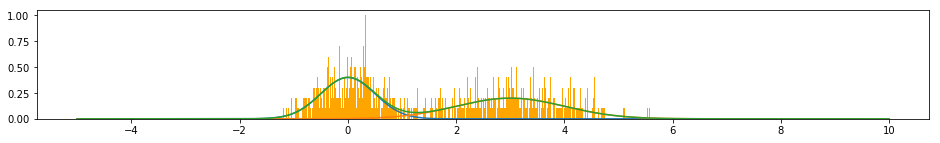

pi = 0.5000, mu_1 = 0.0000, mu_2 = 3.0000, stde_1 = 0.5000, stde_2 = 1.0000


In [5]:
plot_hist_pdf(samples, pi_true, mu_1_true, mu_2_true, stde_1_true, stde_2_true)

# Defining the log-likelihood <a class="anchor" id="Defining negative log-likelihood"></a>

We want to maximise the likelihood of parameter vector $\theta \{p , \mu_1, \sigma_1, \mu_2, \sigma_2\}$ with respect to observations $\mathbf{X}$, ie $\{x_1, x_2,....., x_n\}$.


$$P(\mathbf{X} | \theta) =\prod_i \left[ 
\frac{1-p}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{p}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right] $$

We hope to maximize the log likelihood:

$$\begin{align}
\ell(\theta | \mathbf{X}) &= \log P(\mathbf{X} | \theta) \\
&= \sum_i log\left[ 
\frac{1-p}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right)
+ \frac{p}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right] \\
&= \sum_i log\left( 
(1-p)\phi_1 (x_i)
+ (p)\phi_2 (x_i)\right)
\end{align}$$

We now calculate log-likelihood w.r.t. ground truth for future reference.

In [6]:
global pi_
pi_ = 0.5
global stde_1_
stde_1_ = stde_1_true
global stde_2_
stde_2_ = stde_2_true
global samples
global l_
l_ = len(samples)

def calc_nll(mu_1_, mu_2_):
    return np.sum(
            np.log(
                ((1-pi_)/(stde_1_*np.sqrt(2*np.pi)))
                  *np.exp(-np.power(np.add(samples,[-mu_1_]*l_),2)/(2*stde_1_**2))
                + (pi_/(stde_2_*np.sqrt(2*np.pi)))
                  *np.exp(-np.power(np.add(samples,[-mu_2_]*l_),2)/(2*stde_2_**2))))

nll_true = calc_nll(mu_1_true, mu_2_true)

print("nll_true = {}".format(nll_true))

nll_true = -1684.037068749013


-1684.03706875 -18092.9951633


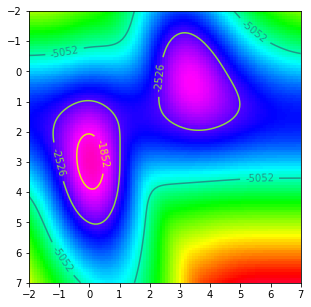

In [7]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import copy

fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(111)

calc_nll_ = np.vectorize(calc_nll)

mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end = -2,7,-2,7
extent=[mu_1_plot_start, mu_1_plot_end, mu_2_plot_end, mu_2_plot_start]

mu_1_linspace = np.linspace(mu_1_plot_start, mu_1_plot_end, 100)
mu_2_linspace = np.linspace(mu_2_plot_start, mu_2_plot_end, 100)

mu_1_possible, mu_2_possible = np.meshgrid(mu_1_linspace, mu_2_linspace)

nll_map = calc_nll_(mu_1_possible, mu_2_possible)
vmax = np.max(nll_map)
vmin = np.min(nll_map)
print(vmax,vmin)
ax1.imshow(nll_map,
           extent = extent,
           cmap=cm.gist_rainbow,
           norm = colors.SymLogNorm(vmax=vmax, vmin=vmin, linthresh=1, clip=True))

assert vmax < 0

CS = plt.contour(nll_map,
                extent = [mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end],
                norm = colors.SymLogNorm(vmax=vmax, vmin=vmin, linthresh=1),
                levels=[vmax*3., vmax*1.5, vmax*1.1]
                )
ax1.clabel(CS, inline=1, fontsize=10, fmt="%d")
plt.show()

In [8]:
# mu_1_possible, mu_2_possible = np.meshgrid(mu_1_linspace,
#                                            np.linspace(mu_2_true, mu_2_true, 1))

# plt.plot(mu_1_linspace, calc_nll_(mu_1_linspace, mu_2_possible)[0])
# plt.show()

In [9]:
# mu_1_possible, mu_2_possible = np.meshgrid(np.linspace(mu_1_true, mu_1_true, 1),
#                                            mu_2_linspace)

# plt.plot(mu_2_linspace, calc_nll_(mu_2_linspace, mu_2_possible)[0])
# plt.show()

# EM algorithm <a class="anchor" id="EM algorithm"></a>

## General Overview
The direct maximisation of $\ell(\theta,\mathbf{X})$ is made difficult because of the sum of terms inside the logarithm. Therefore we define a function $\ell {\left( \theta\right | \mathbf{X}, \mathbf{Z})}$ that is equal at $\theta = \theta_0$ but lower than $\ell(\theta | \mathbf{X})$ everywhere else. The interpretation of the $\mathbf{Z}$ is a vector of hidden variables taking values 0 or 1 that guesses which of $Y_1$ or $Y_2$ each sample $x$ comes from. If $z_i = 0$ then that sample $i$ comes from $Y_1$, if $z_i = 1$ then that sample $i$ comes from $Y_2$.

If we are given a vector $\mathbf{Z}$ of hidden variables $\{ z_1, z_2, \dots, z_n \}$ that are binary values of 1 or 0, the expression becomes:

$$\begin{align}
\log P(\mathbf{X} | \theta, \mathbf{Z}) &= \ell(\theta, \mathbf{Z} | \mathbf{X}) \\ 
&= \sum_i log\left( 
\frac{1- z_i}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{z_i}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right) 
\right)
\end{align}$$

Practically speaking, this then becomes the addition of the log likelihoods of exactly two different distributions, as we now are guessing exactly which distribution each sample comes from.

In [10]:
## we have arbitrary starting points which we will elaborate later
global mu_1
global mu_2
pi, mu_1, stde_1, mu_2, stde_2 = pi_true, 3., stde_1_true, 3., stde_2_true

## Expectation Step <a class="anchor" id="Expectation Step"></a>

Interpretation for responsibility $\gamma_i$: given current model $\theta$, $\gamma_i$ is the probability that the sample belongs to $\phi_2$ rather than $\phi_1$. It can also be interpreted as an approximation for $z$, as the closer $\gamma_i$ is to 1, the more likely $z$ is 1.

$$\gamma_i(\theta) = E\left(z_i | \theta, \mathbf{X}\right) = P\left(z_i = 1 | \theta, \mathbf{X}\right) $$

$$ \gamma_i(\theta) = \frac{p \phi_{2} (x_i)} 
{(1 - p) \phi_{1} ( x_i ) + p \phi_{2} ( x_i )} $$

In [11]:
def expectation_step(pi,mu_1,mu_2,stde_1,stde_2,samples):
    odds_Y1 = [((1-pi)/(stde_1*np.sqrt(2*np.pi))) 
                * np.exp(-(np.add(samples,[-mu_1]*l_))**2. / (2. * stde_1**2))]
    odds_Y2 = [((pi)/(stde_2*np.sqrt(2*np.pi))) 
                * np.exp(-(np.add(samples,[-mu_2]*l_))**2. / (2. * stde_2**2))]
    gamma_i = np.divide(odds_Y2,np.add(odds_Y1,odds_Y2))
    return gamma_i[0]

global gamma_i
gamma_i = expectation_step(pi,mu_1,mu_2,stde_1,stde_2,samples)
print(np.round(gamma_i[:30],3))  # the gamma values of some of the samples

[ 1.     1.     1.     1.     0.756  1.     0.351  0.999  0.434  0.354  1.
  1.     0.396  0.665  0.924  0.334  0.711  1.     0.999  1.     1.     0.529
  0.471  1.     0.335  0.618  0.671  0.732  1.     0.333]


### Insertion of Hidden Variables
We first observe that we can insert the hidden variables $z$ through the law of total probability.

$$
\begin{align} 
\log P(\mathbf{X} | \theta) &= \sum_i log P(x_i| \theta)   \\
&= \sum_i log\left(\sum_z P(x_i|z,\theta)P(z|\theta)\right) \\
&= \sum_i log\left( P(x_i|z =0,\theta)P(z=0|\theta) + P(x_i|z =1,\theta)P(z=1|\theta)\right)\\
\end{align}$$


This corresponds to
$$
\begin{align} 
\log P(\mathbf{X} | \theta) &= \sum_i log\left( \sum_z \left(
\frac{1- z}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{z}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right) \right) \cdot P(z|\theta)
\right) \\
&= \sum_i log\left( \left(
\frac{1- 0}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right)\right)\cdot P(z= 0) 
+ \left(\frac{1}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right) \cdot P(z=1) \right)
\right) \\ 
&= \sum_i log\left( 
\frac{(1-p)}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{(p)}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right)
\right) \\
&= \sum_i log\left( 
(1-p)\phi_1 (x_i)
+ (p)\phi_2 (x_i)\right)
\end{align}$$

% I don't know if '\{multiline}' work in LaTeX.
% I think we need to use different types of parentheses.
% This is markdown not LaTeX, so these comments are still visible

This simplification shows us that the insertion of the hidden variables stil makes the expression mathematically equal to our $\log P(\mathbf{X} | \theta)$ expression at first.

### Derivation of $log P(\mathbf{X} | \mathbf{Z}, \theta)$

The form of $log P(\mathbf{X},\mathbf{Z} | \theta)$ is required in the Expectation step. It has been derived in the EM tutorial (and will be derived later) and is needed to find the next iteration of $\theta$. Hence, we want to find the form of $log P(\mathbf{X},\mathbf{Z} | \theta)$.

$$
\begin{align} 
\log P(\mathbf{X} ,\mathbf{Z} | \theta) &= \sum_i log P(x_i, z_i| \theta)   \\
&= \sum_i log\left( P(x_i|z_i,\theta)P(z_i|\theta)\right) \\
\end{align}$$

We observe that $P(z_i|\theta)$ refers to simply $(1-p)$ when $p=0$ or $p$ when $p = 1$. 

$$
\begin{align} 
\log P(\mathbf{X} ,\mathbf{Z}| \theta) &= \sum_i log \left(
\left(\frac{1- z_i}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right)\cdot (1-p)\right) 
+ \left(\frac{z_i}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right)\cdot(p)\right)
\right) \\
&= \sum_i log\left( 
\frac{(1- z_i)(1-p)}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right) 
+ \frac{(z_i)(p)}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right)
\right)\\
&= \sum_i \left( (1- z_i)log\left(
\frac{(1-p)}{\sigma_1\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_1)^2} {2 \sigma_1^2}}\right) \right)
+ (z_i)log\left(\frac{(p)}{\sigma_2\sqrt{2 \pi}} exp\left({-\frac{(x_i - \mu_2)^2} {2 \sigma_2^2}}\right)\right)
\right) \\
&= \sum_i (1-z_i)log\left( 
(1-p)\phi_1 (x_i)\right)
+ (z_i)log\left( (p)\phi_2 (x_i)\right)
\end{align}$$

The second last step, which involves taking the indicator variables $(1- z_i)$ or $(z_i)$ outside the logarithm terms, holds as the expansion of the terms are equal. i.e $ log(0\cdot x + y) = 0\cdot log(x) + log(y)$

## Maximisation Step <a class="anchor" id="Maximisation Step"></a>
From the tutorial, at the nth iteration with estimated parameters $\theta_{n}$, we can find the n+1 iteration of parameters $\theta_{n+1}$ through maximizing $\sum_{i=1}^N P(z_i|x_i,\theta_n)log P(x_i, z_i|\theta)$ with respect to $\theta$, proven through Jensen's Inequality.


In [12]:
def maximisation_step(gamma_i, samples):
    gamma_1_i = 1 - gamma_i
    pi = np.sum(gamma_i)/l_
    mu_1 = np.sum(np.multiply(gamma_1_i,samples)) / np.sum(gamma_1_i)
    mu_2 = np.sum(np.multiply(gamma_i,samples)) / np.sum(gamma_i)
    stde_1 = np.sqrt(np.sum(np.multiply(gamma_1_i,
                            np.power(np.add(samples,[-mu_1]*l_),2)))/np.sum(gamma_1_i))
    stde_2 = np.sqrt(np.sum(np.multiply(gamma_i,
                            np.power(np.add(samples,[-mu_2]*l_),2)))/np.sum(gamma_i))
    return mu_1, mu_2

global mu_1
global mu_2
mu_1, mu_2 = maximisation_step(gamma_i, samples)
print("pi = {:.4f}, mu_1 = {:.4f}, mu_2 = {:.4f}, stde_1 = {:.4f}, stde_2 = {:.4f}"
      .format(pi,mu_1,mu_2,stde_1,stde_2))
# note how the values are being updated

pi = 0.5000, mu_1 = 3.0105, mu_2 = 1.1063, stde_1 = 0.5000, stde_2 = 1.0000


### Deriving $\theta_{n+1}$

From the EM tutorial, we see a way of iteration is to find a $\theta_{n+1}$ with respect to $\theta$ such that:

$$
\begin{align} 
\theta_{n+1} = argmax \left(\sum_i P(z_i|x_i, \theta_n)\cdot log P(x_i,z_i |\theta) \right) \\
\end{align}$$

The expression for $log P(x,z |\theta)$ has been found above. We can think of $P(z|X, \theta_n)$ as the responsibility, $\gamma$. 

Interpretation for $\gamma_i$: given current model $\theta_n$, $\gamma_i$ is the probability that the $i$th sample belongs to $Y_2$ rather than $Y_1$. In Pattern Theory, ${\gamma}_i$ is analgous to $L_i$.

$$\gamma_i(\theta_n) =\gamma_{i,n} = E\left(z_i | \theta_n, \mathbf{X}\right) = P\left(z_i = 1 | \theta_n, \mathbf{X}\right) $$

$$ \gamma_{i,n} = \frac{p_n \phi_{2,n} ( x_i )}{(1 - p_n) \phi_{1,n} ( x_i ) + p_n \phi_{2,n} ( x_i )} $$

Combining both the expressions we have found above and the responsibilities, we get:

$$
\begin{align} 
\theta_{n+1} 
&= argmax \left(\sum_i P(z_i|x_i,\theta_n)\cdot log P(x_i, z_i|\theta)\right) \\
&= argmax \left(\sum_i P(z_i = 0|x_i,\theta_n) \cdot log P(x_i|\theta, z_i =0) +  P(z_i = 1|x_i,\theta_n)\cdot log P(x_i|\theta, z_i =1) \right) \\
&= argmax \left(\sum_i \gamma_{i,n} \cdot log(p \cdot \phi_{2}(x_i)) + (1 -\gamma_{i,n}) \cdot log((1-p) \cdot \phi_{1}(x_i)) \right) \\
&= argmax \left(\sum_i \frac{p_n \phi_{2,n} ( x_i )}{(1 - p_n) \phi_{1,n} ( x_i ) + p_n \phi_{2,n} ( x_i )} \cdot log(p \cdot \phi_{2}(x_i)) 
+ \left(1 -\frac{p_n \phi_{2,n} ( x_i )}{(1 - p_n) \phi_{1,n} ( x_i ) + p_n \phi_{2,n} ( x_i )} \right) \cdot log((1-p) \cdot \phi_{1}(x_i)) \right) \\
\end{align}$$



In [13]:
from scipy.special import xlogy

def nll_lower_(mu_1_plt,mu_2_plt):
    odds_Y1 = [((1-pi)/(stde_1*np.sqrt(2.*np.pi))) 
                * np.exp(-np.power(np.add(samples,[-mu_1_plt]*l_),2.) / (2. * stde_1**2))]
    odds_Y2 = [((pi)/(stde_2*np.sqrt(2.*np.pi))) 
                * np.exp(-np.power(np.add(samples,[-mu_2_plt]*l_),2.) / (2. * stde_2**2))]
#     l_term = np.sum(np.add(np.multiply(gamma_i,np.log(odds_Y2)),
#                           np.multiply(1-gamma_i,np.log(odds_Y1))))
#     print(np.shape(xlogy(gamma_i,odds_Y2)))
#     p_z_given_xt = np.divide(odds_Y2,np.add(odds_Y1,odds_Y2))
    
    
#                     (1-pi_)/(stde_1_*np.sqrt(2*np.pi))
#                   *np.exp(-np.power(np.add(samples,[-mu_1_]*l_),2))/(2*stde_1_**2)
#                 + (pi_/(stde_2_*np.sqrt(2*np.pi)))
#                   *np.exp(-np.power(np.add(samples,[-mu_2_]*l_),2))/(2*stde_2_**2)))
    
    
    l_term = np.sum(np.add(np.add(xlogy(gamma_i, odds_Y2),-xlogy(gamma_i,gamma_i)),
                           np.add(xlogy(1-gamma_i, odds_Y1),-xlogy(1-gamma_i,1-gamma_i))))
    
#     l_term = np.sum(np.add(
#                            np.add(
#                                   xlogy(gamma_i,odds_Y2)
#                                   ,np.add(-xlogy(gamma_i,gamma_i),
#                                           xlogy(gamma_i,np.divide(p_z_given_xt, gamma_i)),
#                                           ))
#                            ,
#                            np.add(
#                                xlogy(1-gamma_i,odds_Y1)
#                                   ,np.add(-xlogy(1-gamma_i,1-gamma_i),
#                                           xlogy(1-gamma_i,np.divide(1-p_z_given_xt, 1-gamma_i)),
#                                          ))
#                    ))
    
    return l_term
    
#     q_term_1 = [((1-pi)/(stde_1*np.sqrt(2.*np.pi))) 
#                 * np.exp(-(np.add(samples,[-mu_1]*l_))**2. / (2. * stde_1**2))]
#     q_term_2 = [((pi)/(stde_2*np.sqrt(2.*np.pi))) 
#                 * np.exp(-(np.add(samples,[-mu_2]*l_))**2. / (2. * stde_2**2))]
#     q_term = np.add(q_term_1, q_term_2)
#     addn_term = np.sum(np.multiply(q_term, np.log(q_term)))
#     print(addn_term)
#     return np.add(l_term, -addn_term)
#     return l_term

nll_lower = np.vectorize(nll_lower_)
global nll_lower_map
nll_lower_map = nll_lower(mu_1_possible, mu_2_possible)

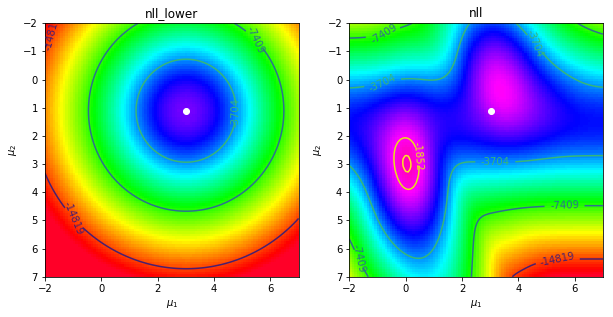

3.01051690037 1.10634598164
-2117.64260677
-2383.09878037


In [14]:
def plot_ell_compare(nll_lower_map, nll_map):
    
    mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end = -2,7,-2,7
    mu_1_linspace = np.linspace(mu_1_plot_start, mu_1_plot_end, 100)
    mu_2_linspace = np.linspace(mu_2_plot_start, mu_2_plot_end, 100)
    mu_1_possible, mu_2_possible = np.meshgrid(mu_1_linspace, mu_2_linspace)
    extent=[mu_1_plot_start, mu_1_plot_end, mu_2_plot_end, mu_2_plot_start]
    
    fig1 = plt.figure(figsize=(10,10))
    ax1 = fig1.add_subplot(121)
    ax1.imshow(nll_lower_map,
               extent = extent,
               cmap=cm.gist_rainbow,
               norm = colors.SymLogNorm(vmax=vmax, vmin=vmin, linthresh=1, clip=True)
              )
    CS = ax1.contour(nll_lower_map,
           extent = [mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end],
           norm = colors.SymLogNorm(vmax=vmax, vmin=vmin, linthresh=1, clip=True),
                    levels=[vmax*8.8, vmax*4.4, vmax*2.2, vmax*1.1, vmax*1.01]
                    )
    
#     ax1.axvline(x=mu_1_true, linewidth=2, color='k', linestyle='dotted')
#     ax1.axhline(y=mu_2_true, linewidth=2, color='k', linestyle='dotted')
    ax1.clabel(CS, inline=1, fontsize=10, fmt="%d")
    ax1.set_xlabel("$\mu_1$")
    ax1.set_ylabel("$\mu_2$")
    ax1.set_title("nll_lower")
    ax1.scatter(mu_1,mu_2,color="white")

    ax2 = fig1.add_subplot(122)
    ax2.imshow(nll_map,
           extent = extent,
           cmap=cm.gist_rainbow,
           norm = colors.SymLogNorm(vmax=vmax, vmin=vmin, linthresh=1, clip=True)
    # norm=colors.LogNorm(vmin=nll_map.min(), vmax=nll_map.max())
          )
    ax2.scatter(mu_1,mu_2,color="white")

    CS = plt.contour(nll_map,
           extent = [mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end],
                     norm = colors.SymLogNorm(vmax=vmax, vmin=vmin, linthresh=1, clip=True),
                     levels=[vmax*8.8, vmax*4.4, vmax*2.2, vmax*1.1, vmax*1.01]
                    )
    ax2.clabel(CS, inline=1, fontsize=10, fmt="%d")
    ax2.set_xlabel("$\mu_1$")
    ax2.set_ylabel("$\mu_2$")
    ax2.set_title("nll")
    plt.show()
    
%matplotlib inline
plot_ell_compare(nll_lower_map, nll_map)
print(mu_1,mu_2)
print(calc_nll(mu_1,mu_2))
print(nll_lower_(mu_1,mu_2))

[ 1.     1.     1.     1.     0.756  1.     0.351  0.999  0.434  0.354  1.
  1.     0.396  0.665  0.924  0.334  0.711  1.     0.999  1.     1.     0.529
  0.471  1.     0.335  0.618  0.671  0.732  1.     0.333]


/home/hk/.conda/envs/mir/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


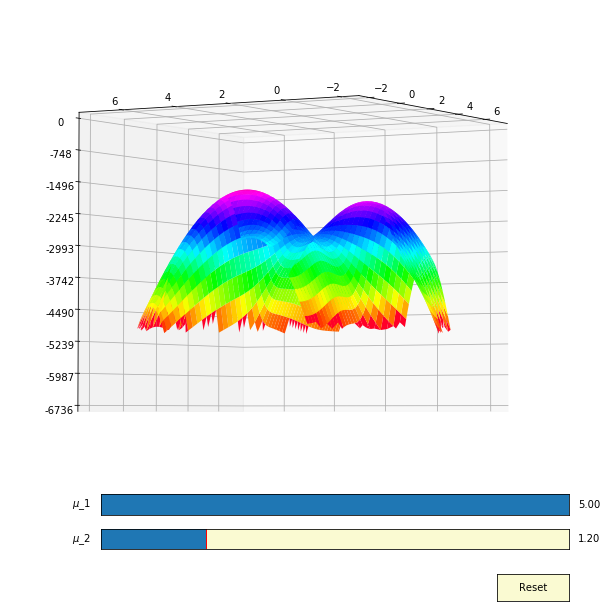

In [15]:
%matplotlib tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import copy


# fig, ax = plt.subplots()
# plt.subplots_adjust(left=0.25, bottom=0.25)
# t = np.arange(0.0, 1.0, 0.001)
# a0 = 5
# f0 = 1.2
# delta_f = 5.0
# s = a0*np.sin(2*np.pi*f0*t)
# l, = plt.plot(t, s, lw=2, color='red')
# plt.axis([0, 1, -10, 10])


mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end = -2,7,-2,7
mu_1_linspace = np.linspace(mu_1_plot_start, mu_1_plot_end, 100)
mu_2_linspace = np.linspace(mu_2_plot_start, mu_2_plot_end, 100)
mu_1_possible, mu_2_possible = np.meshgrid(mu_1_linspace, mu_2_linspace)
extent=[mu_1_plot_start, mu_1_plot_end, mu_2_plot_end, mu_2_plot_start]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
nll_map_ = copy.deepcopy(nll_map)
nll_map_[nll_map_<-5000.] = np.nan
global surf


surf = ax.plot_surface(mu_1_possible, mu_2_possible, nll_map_,
                cmap=cm.gist_rainbow,
                vmin=3.*vmax,
                vmax=vmax)
# global wire
# wire = ax.plot_wireframe(mu_1_possible, mu_2_possible, nll_lower_map)
# wire.remove()


ax.view_init(-3, 210)
ax.set_zlim3d(vmax*4., 0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))


axcolor = 'lightgoldenrodyellow'
ax_mu_1 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_mu_2 = plt.axes([0.25, 0.10, 0.65, 0.03], facecolor=axcolor)

mu_1_init = 5
mu_2_init = 1.2
s_mu_1 = Slider(ax_mu_1, '$\mu$_1', 0.1, 5.0, valinit=mu_1_init)
s_mu_2 = Slider(ax_mu_2, '$\mu$_2', 0.1, 5.0, valinit=mu_2_init)


print(np.round(gamma_i[:30],3))  # the gamma values of some of the samples
# print(nll_lower_map)


def update(val):
    
    mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end = -2,7,-2,7
    mu_1_linspace = np.linspace(mu_1_plot_start, mu_1_plot_end, 100)
    mu_2_linspace = np.linspace(mu_2_plot_start, mu_2_plot_end, 100)
    mu_1_possible, mu_2_possible = np.meshgrid(mu_1_linspace, mu_2_linspace)

    mu_1 = s_mu_1.val
    mu_2 = s_mu_2.val
    print(pi,mu_1,mu_2,stde_1,stde_2)
    gamma_i = expectation_step(pi,mu_1,mu_2,stde_1,stde_2,samples)
    print(np.round(gamma_i[:30],3))  # the gamma values of some of the samples

    def nll_lower_(mu_1,mu_2):
        odds_Y1 = [((1-pi)/(stde_1*np.sqrt(2.*np.pi))) 
                    * np.exp(-(np.add(samples,[-mu_1]*l_))**2. / (2. * stde_1**2))]
        odds_Y2 = [((pi)/(stde_2*np.sqrt(2.*np.pi))) 
                    * np.exp(-(np.add(samples,[-mu_2]*l_))**2. / (2. * stde_2**2))]
        return np.sum(np.add(np.multiply(gamma_i,np.log(odds_Y2)),
                              np.multiply(1-gamma_i,np.log(odds_Y1))))

    nll_lower = np.vectorize(nll_lower_)
    nll_lower_map_ = nll_lower(mu_1_possible, mu_2_possible)
    print(nll_lower_map_[0:3,0:3])

    if len(list(ax.collections)) > 1:
        print("delet this")
        ax.collections.remove(list(ax.collections)[-1])
#         ax.collections.remove(list(ax.collections)[-1])
        
    wire = ax.plot_wireframe(mu_1_possible, mu_2_possible, np.transpose(nll_lower_map_))
    
    line = ax.plot([mu_1,mu_1],[mu_2,mu_2],[0,nll_lower(mu_1, mu_2)],
                   color = 'g')
    fig.canvas.draw()
    
s_mu_1.on_changed(update)
s_mu_2.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    s_mu_1.reset()
    s_mu_2.reset()
button.on_clicked(reset)

# rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
# radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

# def colorfunc(label):
#     l.set_color(label)
#     fig.canvas.draw_idle()
# radio.on_clicked(colorfunc)

plt.show()

In [16]:
!python -c 'import matplotlib; print(matplotlib.__version__)'

2.0.2


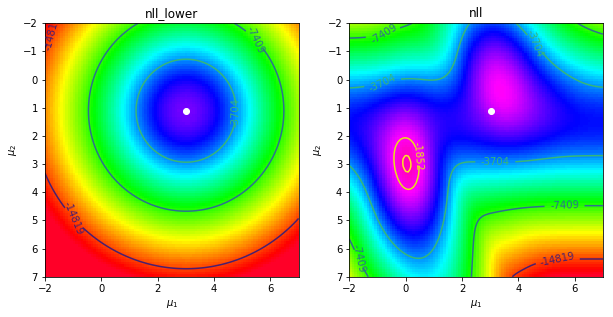

In [17]:
%matplotlib inline
plot_ell_compare(nll_lower_map, nll_map)

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import copy

%matplotlib tk
def plot_ell_compare3d(nll_lower_map, nll_map):
    mu_1_plot_start, mu_1_plot_end, mu_2_plot_start, mu_2_plot_end = -2,7,-2,7
    mu_1_linspace = np.linspace(mu_1_plot_start, mu_1_plot_end, 100)
    mu_2_linspace = np.linspace(mu_2_plot_start, mu_2_plot_end, 100)
    mu_1_possible, mu_2_possible = np.meshgrid(mu_1_linspace, mu_2_linspace)
    extent=[mu_1_plot_start, mu_1_plot_end, mu_2_plot_end, mu_2_plot_start]
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
#     nll_map_ = np.ma.array(nll_map, mask=(nll_map<2.*vmax))
    nll_map_ = copy.deepcopy(nll_map)
    nll_map_[nll_map_<-5000.] = np.nan
    ax.plot_surface(mu_1_possible, mu_2_possible, nll_map_,
                    cmap=cm.gist_rainbow,
                    vmin=3.*vmax,
                    vmax=vmax)
    ax.plot_wireframe(mu_1_possible, mu_2_possible, nll_lower_map)

    ax.view_init(-30, 210)
    ax.set_zlim3d(vmax*4., 0)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))
    plt.show()

/home/hk/.conda/envs/mir/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


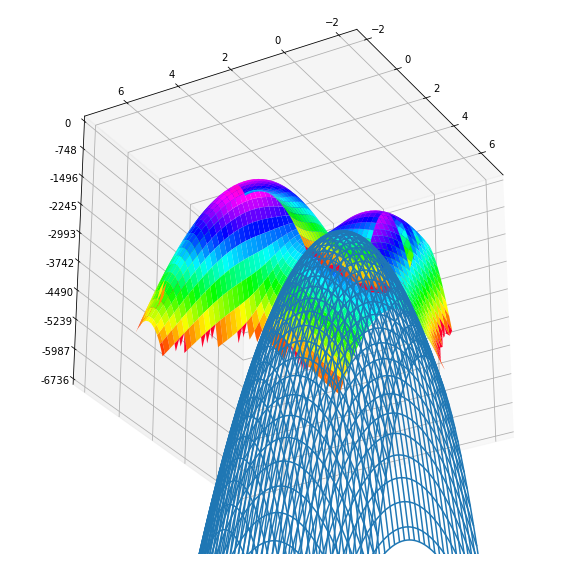

In [19]:
%matplotlib inline
plot_ell_compare3d(nll_lower_map, nll_map)

## Solutions for $\theta_{n+1}$
To find $\theta_{n+1}$, we set $\frac{\partial}{\partial \theta} \left(\sum_i \gamma_{i,n} \cdot log(p \cdot \phi_{2}(x_i)) + (1 -\gamma_{i,n}) \cdot log((1-p) \cdot \phi_{1}(x_i)) \right)=0$



We first find the expression of $\mu_{2,n+1}$, which is the $\mu_2$ that fulfills the equation above.
$$
\begin{align}
\frac{\partial}{\partial \mu_{2}} \left(\sum_i \gamma_{i,n} \cdot log(p_n \cdot \phi_{2}(x_i)) + (1 -\gamma_{i,n}) \cdot log((1-p) \cdot \phi_{1}(x_i)) \right) &=0 \\
\frac{\partial}{\partial \mu_{2}} \left(\sum_i \gamma_{i,n} \cdot log(p_n \cdot \phi_{2}(x_i)) \right)&=0 \\
\frac{\partial}{\partial \mu_{2}} \left(\sum_i \gamma_{i,n} \cdot log(\frac{p_n}{\sigma_{2,n} \sqrt{2 \pi}} \cdot exp \left( -\frac{(x_i - \mu_{2})^2} {2 \sigma_{2,n}^2} \right)) \right)&=0 \\
\sum_i \gamma_{i,n} \cdot \frac{x_i - \mu_2}{\sigma_{2,n}^2} &=0 \\
\mu_2 = \frac{\sum_i \gamma_{i,n} \cdot x_i}{\sum_i \gamma_{i,n}}   \\
\end{align}$$

We then find $\sigma_{2,n+1}$.
$$
\begin{align}
\frac{\partial}{\partial \sigma_{2}} \left(\sum_i \gamma_{i,n} \cdot log(p_n \cdot \phi_{2}(x_i)) + (1 -\gamma_{i,n}) \cdot log((1-p_n) \cdot \phi_{1}(x_i)) \right) &=0 \\
\frac{\partial}{\partial \sigma_{2}} \left(\sum_i \gamma_{i,n} \cdot log(p_n \cdot \phi_{2}(x_i)) \right)&=0 \\
\frac{\partial}{\partial \sigma_{2}} \left(\sum_i \gamma_{i,n} \cdot log(\frac{p_n}{\sigma_{2} \sqrt{2 \pi}} \cdot exp ( -\frac{(x_i - \mu_{2,n})^2} {2 \sigma_{2}^2} ) \right)&=0 \\
\sum_i \gamma_{i,n} \cdot \left(-\frac{1}{\sigma_2} +\frac{(x_i-\mu_{2,n})^2}{\sigma_{2}^3}  \right) &=0 \\
\sum_i \gamma_{i,n} \cdot \left(\frac{(x_i-\mu_{2,n})^2-\sigma_{2}^2}{\sigma_{2}^3}  \right) &=0 \\
\sum_i \gamma_{i,n} \cdot (x_i-\mu_{2,n})^2 &= \sum_i \gamma_{i,n} \cdot \sigma_{2}^2 \\
\sigma_{2} &= \frac{\sum_{i=1} \gamma_{i,n} (x_i - \mu_{2,n})^2}{\sum_{i=1} \gamma_{i,n}}  \\
\end{align}$$

We then find $p_{n+1}$.
$$
\begin{align}
\frac{\partial}{\partial p} \left(\sum_i \gamma_{i,n} \cdot log(p \cdot \phi_{2}(x_i)) + (1 -\gamma_{i,n}) \cdot log((1-p) \cdot \phi_{1}(x_i)) \right) &=0 \\
\sum_i \gamma_{i,n} \left(\frac{\sigma_{2,n} \sqrt{2 \pi}}{p} \cdot \frac{1}{\sigma_{2,n} \sqrt{2 \pi}}   \right) + (1- \gamma_{i,n}) \left(\frac{\sigma_{1,n} \sqrt{2 \pi}}{1-p} \cdot \frac{-1}{\sigma_{1,n} \sqrt{2 \pi}}   \right) &=0 \\
\sum_i \frac{\gamma_{i,n}}{p} + \frac{1- \gamma_{i,n}}{p-1} &=0 \\
\sum_i \frac{\gamma_{i,n} \cdot (p-1) + (1 - \gamma_{i,n}) \cdot (p)}{(p)(p-1)} &=0 \\
\sum_i \frac{p - \gamma_{i,n}}{(p)(p-1)} &=0 \\
\sum_i p &= \sum_i \gamma_{i,n}\\
p &= \frac{\sum_i \gamma_{i,n}}{N}\\
\end{align}$$

## Summary of Solutions for $\theta_{n+1}$
$$\begin{align}
p_{n+1}&= \frac{
\sum_{i=1}^N \gamma_{i,n}
}{
N
} \\
\mu_{1,n+1} &= \frac{
\sum_{i=1}^N (1 - \gamma_{i,n}) x_i
}{
\sum_{i=1}^N (1 - \gamma_{i,n})
} \\
\sigma_{1, n+1} &= \frac{
\sum_{i=1}^N (1 - \gamma_{i,n}) (x_i - \mu_{2,n})^2
}{
\sum_{i=1}^N (1 - \gamma_{i,n})
} \\
\mu_{2,n+1} &= \frac{
\sum_{i=1}^N \gamma_{i,n} x_i
}{
\sum_{i=1}^N \gamma_{i,n}
} \\
\sigma_{2, n+1} &= \frac{
\sum_{i=1}^N \gamma_{i,n} (x_i - \mu_{2,n})^2
}{
\sum_{i=1}^N \gamma_{i,n}
} 
\end{align}$$


# Performing iterations <a class="anchor" id="Performing iterations"></a>
We will do many iterations, and see their result.

AttributeError: Unknown property valstep

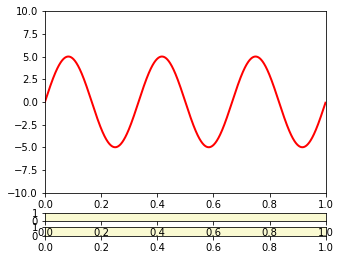

In [20]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

# rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
# radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

# def colorfunc(label):
#     l.set_color(label)
#     fig.canvas.draw_idle()
# radio.on_clicked(colorfunc)

plt.show()

## Setting the initial parameters <a class="anchor" id="Setting the initial parameters"></a>
We will need to start from a set of parameters to begin our parameters from. Perhaps we should use something that is reasonable. The initial mean for each of the distribution value should be slightly different from one another so they can start diverging.

$$\begin{align}
\hat{\mu}_1 &= +\epsilon + \frac{1}{N} \sum_{i=1}^N x_i \\
\hat{\sigma}_1 &= \sqrt{\frac{1}{N-1} \sum_{i=1}^N  (x_i - \hat{\mu}_2)^2} \\
\hat{\mu}_2 &= - \epsilon + \frac{1}{N} \sum_{i=1}^N x_i \\
\hat{\sigma}_2 &= \sqrt{\frac{1}{N-1} \sum_{i=1}^N  (x_i - \hat{\mu}_2)^2} \\
\hat{\pi} &= 0.5 
\end{align}$$

In [ ]:
# the five parameters
pi = pi_true # probability if it lies from 
mu_1 = 0.
stde_1 = stde_1_true 
mu_2 = 0.1
stde_2 = stde_2_true

In [ ]:
pi_list = [pi]
mu_1_list = [mu_1]
stde_1_list = [stde_1]
mu_2_list = [mu_2]
stde_2_list = [stde_2]
nll = calc_nll(mu_1, mu_2)
nll_list = [nll]

In [ ]:
%matplotlib inline
iterations = 10
plotting = False
for x in range(iterations):
    
    if x%1 == 0:
        plot_hist_pdf(samples, pi, mu_1, mu_2, stde_1, stde_2)
        print("interation {}, nll = {}".format(x, nll))

    gamma_i = expectation_step(pi,mu_1,mu_2,stde_1,stde_2,samples)
    
    nll_lower_map = nll_lower(mu_1_possible, mu_2_possible)
    plot_ell_compare(nll_lower_map, nll_map)
    plot_ell_compare3d(nll_lower_map, nll_map)
    
    mu_1, mu_2 = maximisation_step(gamma_i, samples)
    
    pi_list.append(pi)
    mu_1_list.append(mu_1)
    stde_1_list.append(stde_1)
    mu_2_list.append(mu_2)
    stde_2_list.append(stde_2)
    nll = calc_nll(mu_1, mu_2)
    nll_list.append(nll)

### Statistics on the rate of decrease of nll

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(np.add(pi_list,-pi_true), label="$\hat{\pi}$")
plt.plot(np.add(mu_1_list,-mu_1_true), label="$\hat{\mu}_1$")
plt.plot(np.add(stde_1_list,-stde_1_true), label="$\hat{\sigma}_1$")
plt.plot(np.add(mu_2_list,-mu_2_true), label="$\hat{\mu}_2$")
plt.plot(np.add(stde_2_list,-stde_2_true), label="$\hat{\sigma}_2$")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(loc="best")
plt.show()

In [ ]:
plt.figure(figsize=(16,2))
plt.plot(nll_list-nll_true, label="negative log likelihood, difference from ground truth")
plt.legend(loc="best")
plt.yscale('symlog')  # linear when near zero
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [ ]:
x = 1/np.e
np.log(np.power(x,x))

In [ ]:
print(1-gamma_i)

In [ ]:
np.log(np.power(1-gamma_i,1-gamma_i))

In [ ]:
gamma_i

In [ ]:
x = 0
a = x * np.log(x)
b = np.log(np.power(x,x))
print(a,b)

for i in range(-30,30,10):
    x = 10.**-i 
    a = x * np.log(x)
    b = np.log(np.power(x,x))
    print(a,b)

In [ ]:
np.array(xlogy([10,13],[10,13]))

In [ ]:
np.log(10)

In [ ]:
np.sum([[1,2],[1,4],[1,2],np.log([1,4])])